<a href="https://colab.research.google.com/github/aniket328/college-sem/blob/main/Copy_of_EM_LAB_ASSIGN_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
data= pd.read_excel('/content/vlfdata.xlsx')
data

FileNotFoundError: ignored

In [ ]:
real = data['%real']
img = data['%Imaginary']

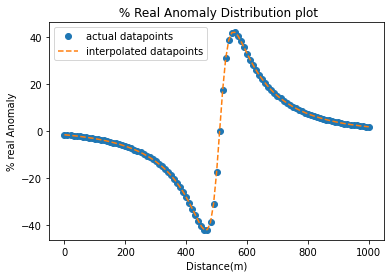

In [ ]:
from scipy.interpolate import interp1d
x = data['distance(m)']
interpol_real= interp1d(x, real)
interpol_img = interp1d(x, img)
xnew= np.arange(0,1001,2)
plt.plot(x,real,'o',xnew, interpol_real(xnew),'--')
plt.legend(['actual datapoints', 'interpolated datapoints'])
plt.xlabel('Distance(m)')
plt.ylabel('% real Anomaly')
plt.title(' % Real Anomaly Distribution plot')
plt.show()

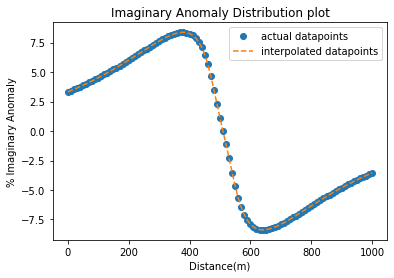

In [ ]:
plt.plot(x, img,'o', xnew,interpol_img(xnew),'--')
plt.legend(['actual datapoints', 'interpolated datapoints'])
plt.xlabel('Distance(m)')
plt.ylabel('% Imaginary Anomaly')
plt.title('Imaginary Anomaly Distribution plot')
plt.show()

In [ ]:
real=interpol_real(xnew)
img=interpol_img(xnew)

In [ ]:
 def fraser_filter(z):
  J_app_real=[]
  J_app_img=[]
  for j in range(1,z+1):
    J_app_real_layer=[]
    J_app_img_layer=[]
    for s in range(2*j):
      J_app_real_layer.append(0)
      J_app_img_layer.append(0)
    for i in range(2*j,501-2*j,1):
      J_app_real_layer.append(real[i-2*j]+real[i-j]-real[i+2*j]-real[i+j])
      J_app_img_layer.append(img[i-2*j]+img[i-j]-img[i+2*j]-img[i+j])
    for s in range(2*j):
      J_app_real_layer.append(0)
      J_app_img_layer.append(0)  
    J_app_img.append(J_app_img_layer)
    J_app_real.append(J_app_real_layer)  
  return J_app_img,J_app_real  

In [ ]:
I,R=fraser_filter(30)

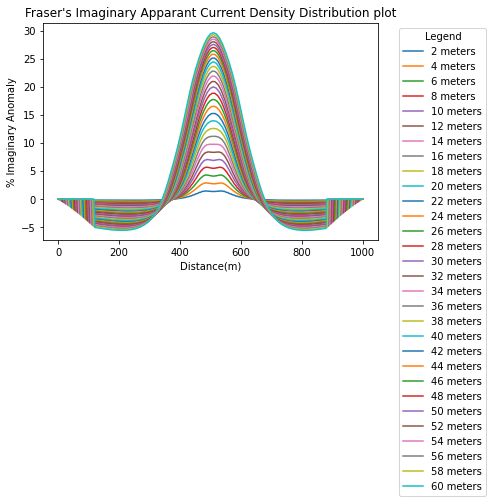

In [ ]:
for i in range (30):
  plt.plot(xnew, I[i])

plt.legend([str(2*(i+1))+" meters" for i  in range(30)],
           title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Distance(m)')
plt.ylabel(' Imaginary Apparant Current Density')
plt.title("Fraser's Imaginary Apparant Current Density Distribution plot")

plt.show()

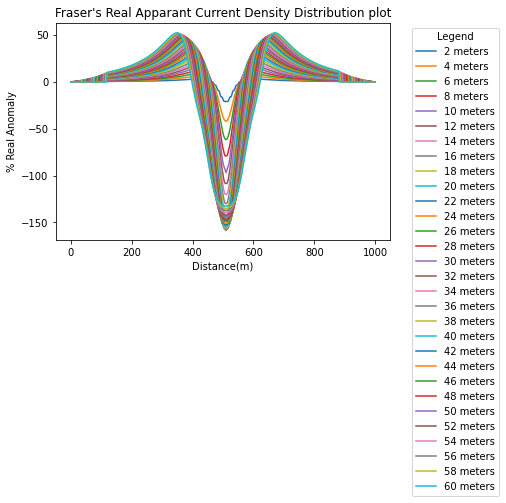

In [ ]:
for i in range (30):
  plt.plot(xnew, R[i])

plt.legend([str(2*(i+1))+" meters" for i  in range(30)],
           title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Distance(m)')
plt.ylabel('Real Apparant Current Density')
plt.title("Fraser's Real Apparant Current Density Distribution plot")
plt.show()

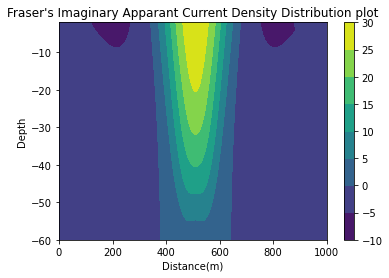

In [ ]:
a = -np.array(np.arange(60,1,-2)) 
b = np.array(xnew) 
b,a = np.meshgrid(b, a) 
plt.contourf(b, a,np.array(I)) 
plt.colorbar()
plt.xlabel('Distance(m)')
plt.ylabel('Depth')
plt.title("Fraser's Imaginary Apparant Current Density Distribution plot")
plt.show()

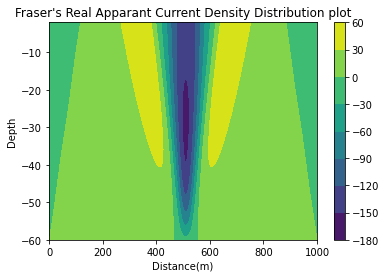

In [ ]:
plt.contourf(b, a,np.array(R)) 
plt.colorbar()
plt.xlabel('Distance(m)')
plt.ylabel('Depth')
plt.title("Fraser's Real Apparant Current Density Distribution plot")
plt.show()

In [ ]:
 def KH_filter(z):
  J_app_real=[]
  J_app_img=[]
  for j in range(1,z+1):
    J_app_real_layer=[]
    J_app_img_layer=[]
    for s in range(3*j):
      J_app_real_layer.append(0)
      J_app_img_layer.append(0)
    for i in range(3*j,501-3*j,1):
      J_app_real_layer.append((2*np.pi/j)*(-0.102*real[i-3*j]+0.059*real[i-2*j]-0.561*real[i-j]+0.102*real[i+3*j]-0.059*real[i+2*j]+0.561*real[i+j]))
      J_app_img_layer.append((2*np.pi/j)*(-0.102*img[i-3*j]+0.059*img[i-2*j]-0.561*img[i-j]+0.102*img[i+3*j]-0.059*img[i+2*j]+0.561*img[i+j]))
    for s in range(3*j):
      J_app_real_layer.append(0)
      J_app_img_layer.append(0)  
    J_app_img.append(J_app_img_layer)
    J_app_real.append(J_app_real_layer)  
  return J_app_img,J_app_real  

In [ ]:
I_kh,R_kh=KH_filter(30)

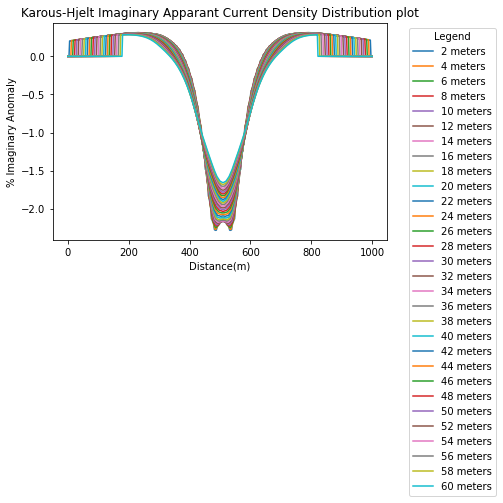

In [ ]:
for i in range (30):
  plt.plot(xnew, I_kh[i])
plt.legend([str(2*(i+1))+" meters" for i  in range(30)],
           title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Distance(m)')
plt.ylabel('Imaginary Apparant Current Density')
plt.title("Karous-Hjelt Imaginary Apparant Current Density Distribution plot")
plt.show()

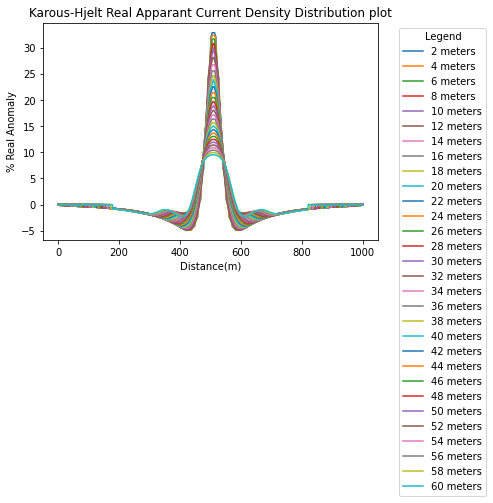

In [ ]:
for i in range (30):
  plt.plot(xnew, R_kh[i])

plt.legend([str(2*(i+1))+" meters" for i  in range(30)],
           title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Distance(m)')
plt.ylabel('Real Apparant Current Density')
plt.title("Karous-Hjelt Real Apparant Current Density Distribution plot")
plt.show()

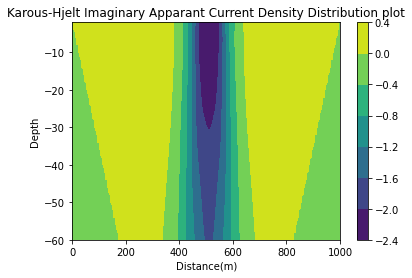

In [ ]:
a = -np.array(np.arange(2,61,2)) 
b = np.array(xnew) 
b,a = np.meshgrid(b, a) 
plt.contourf(b, a,np.array(I_kh)) 
plt.colorbar()
plt.xlabel('Distance(m)')
plt.ylabel('Depth')
plt.title("Karous-Hjelt Imaginary Apparant Current Density Distribution plot")
plt.show()

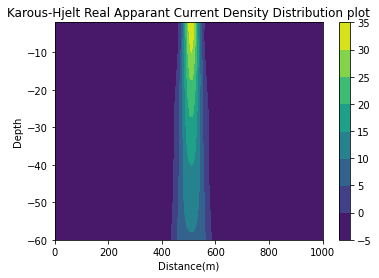

In [ ]:
plt.contourf(b, a,np.array(R_khan)) 
plt.colorbar()
plt.xlabel('Distance(m)')
plt.ylabel('Depth')
plt.title("Karous-Hjelt Real Apparant Current Density Distribution plot")
plt.show()